In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict
from dotenv import load_dotenv
import os

In [2]:
load_dotenv()

True

In [3]:
model = ChatGoogleGenerativeAI(model="gemini-2.5-flash",temperature=0)

In [4]:
class BlogState(TypedDict):
    title: str
    outline: str
    content: str

In [5]:
def create_outline(state: BlogState) -> BlogState:
    #fetch title
    title = state['title']

    #call llm gen outline
    prompt = f"generate a detailed outline for a blog post with the title: {title}"

    outline = model.invoke(prompt)
    
    # update state
    state['outline'] = outline

    return state

In [6]:
def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f"write a detailed blog on the title {title} using the following outline: \n {outline}"

    content = model.invoke(prompt)

    state['content'] = content

    return state

In [9]:
graph = StateGraph(BlogState)

#nodes
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)

#edges
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', END)

workflow = graph.compile()


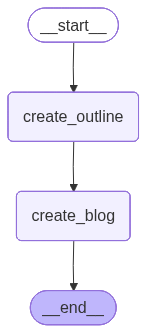

In [10]:
workflow

In [11]:
INITIAL_STATE = {
    'title': "Rise of AI in Pakistan"
}

final_state = workflow.invoke(INITIAL_STATE)

print(final_state['content'])

content='## Rise of AI in Pakistan: Opportunities, Challenges, and the Path Forward\n\nFrom smart assistants to self-driving cars, Artificial Intelligence (AI) is no longer a futuristic concept but a present-day reality reshaping industries and societies worldwide. Its transformative power is undeniable, promising unprecedented advancements in efficiency, innovation, and problem-solving. While often seen as a developing nation, Pakistan is increasingly recognizing and embracing the potential of AI, witnessing a quiet but significant "rise" in its adoption and development.\n\nAt its core, AI refers to the ability of machines to perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. This post will explore the burgeoning AI landscape in Pakistan, highlighting the driving forces behind its growth, the sectors it\'s transforming, the hurdles it faces, and the strategic steps needed to harness its full potential for national developme

In [12]:
print(final_state['outline'])

content='Here\'s a detailed outline for a blog post titled "Rise of AI in Pakistan," covering key aspects from current trends to future potential and challenges.\n\n---\n\n## Blog Post Outline: Rise of AI in Pakistan\n\n**Blog Post Title:** Rise of AI in Pakistan: Opportunities, Challenges, and the Path Forward\n\n---\n\n**I. Introduction (Approx. 150-200 words)**\n\n*   **A. Hook:** Start with a compelling statement about the global AI revolution and its transformative power.\n    *   *Example:* "From smart assistants to self-driving cars, Artificial Intelligence (AI) is no longer a futuristic concept but a present-day reality reshaping industries and societies worldwide."\n*   **B. Introduce Pakistan\'s Context:** Briefly pivot to Pakistan\'s position in this global shift.\n    *   *Example:* "While often seen as a developing nation, Pakistan is increasingly recognizing and embracing the potential of AI, witnessing a quiet but significant \'rise\' in its adoption and development."\n*